In [1]:
import pandas as pd
import alphalens

In [2]:
data = pd.read_csv(r'/home/ibrahim/Desktop/internship_project/data/Price.csv',index_col='Unnamed: 0')

/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
pivotdata = data.pivot_table(values='adjusted_close',index='date',columns='symbol')
pivotdata.index = pd.to_datetime(pivotdata.index)

In [4]:
pivotdata = pivotdata['2000-01-01':]

In [5]:
returns = pivotdata.pct_change()

In [6]:
def scores_to_alphalens(scores):
    scores_alphalens = scores.unstack()
    scores_alphalens = scores_alphalens.reset_index(level=[0,1])
    scores_alphalens.columns = ['symbol', 'date', 'factor']
    scores_alphalens = scores_alphalens.set_index(['date','symbol'])
    
    return scores_alphalens

In [7]:
scores_per10day = returns.rolling(window=10,min_periods=8).std().dropna(thresh=15,axis=0).dropna(how='all',axis=1)

In [8]:
sc_p10day= scores_to_alphalens(scores_per10day)

In [9]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor=sc_p10day,prices=pivotdata,quantiles=9 ,periods=(1,5,10,20, 60,120,240))

Dropped 31.3% entries from factor data: 31.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.000000e+00,0.099646,0.005421,0.008119,199525,11.237154
2,1.016507e-09,0.112706,0.012590,0.009217,196901,11.089372
3,4.792670e-03,0.117527,0.016390,0.009372,197168,11.104409
4,7.743605e-03,0.121962,0.019115,0.009900,196427,11.062676
5,1.017775e-02,0.126918,0.021825,0.010390,196469,11.065042
6,1.225463e-02,0.131264,0.024942,0.010889,197560,11.126486
7,1.452652e-02,0.136718,0.029115,0.011407,195589,11.015481
8,1.793866e-02,0.142269,0.036351,0.011921,197376,11.116124
9,2.477416e-02,14.271385,0.061901,0.109707,198568,11.183256


Returns Analysis


,1D,5D,10D,20D,60D,120D,240D
Ann. alpha,0.313,0.073,0.016,0.029,0.012,0.015,-0.006
beta,0.087,-0.100,-0.051,-0.067,-0.020,-0.062,0.037
Mean Period Wise Return Top Quantile (bps),-1.256,-3.361,-3.708,-2.987,-2.045,-2.363,-1.677
Mean Period Wise Return Bottom Quantile (bps),-3.337,-3.494,-3.526,-3.833,-3.883,-3.046,-3.141
Mean Period Wise Spread (bps),2.081,0.034,-0.245,0.804,1.878,0.990,2.562


/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Information Analysis


,1D,5D,10D,20D,60D,120D,240D
IC Mean,-0.044,-0.051,-0.053,-0.055,-0.054,-0.058,-0.057
IC Std.,0.138,0.132,0.126,0.126,0.124,0.123,0.127
Risk-Adjusted IC,-0.316,-0.391,-0.418,-0.434,-0.437,-0.467,-0.446
t-stat(IC),NaN,-26.435,-28.264,-29.357,-29.523,-31.551,-30.151
p-value(IC),NaN,0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,NaN,0.399,0.303,0.428,0.341,0.481,0.582
IC Kurtosis,NaN,1.161,0.997,0.737,-0.026,0.132,0.415


/home/ibrahim/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/datetimes.py:962: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Turnover Analysis


,10D,120D,1D,20D,240D,5D,60D
Quantile 1 Mean Turnover,0.398,0.481,0.122,0.419,0.523,0.301,0.451
Quantile 2 Mean Turnover,0.753,0.808,0.315,0.772,0.835,0.633,0.791
Quantile 3 Mean Turnover,0.840,0.863,0.421,0.850,0.872,0.751,0.857
Quantile 4 Mean Turnover,0.857,0.873,0.459,0.863,0.876,0.786,0.869
Quantile 5 Mean Turnover,0.860,0.873,0.459,0.866,0.878,0.789,0.870
Quantile 6 Mean Turnover,0.861,0.872,0.428,0.864,0.876,0.776,0.868
Quantile 7 Mean Turnover,0.853,0.871,0.371,0.861,0.878,0.740,0.866
Quantile 8 Mean Turnover,0.825,0.862,0.279,0.842,0.869,0.658,0.854
Quantile 9 Mean Turnover,0.682,0.804,0.125,0.741,0.825,0.419,0.784


,1D,5D,10D,20D,60D,120D,240D
Mean Factor Rank Autocorrelation,0.944,0.707,0.446,0.377,0.318,0.28,0.243


<Figure size 432x288 with 0 Axes>

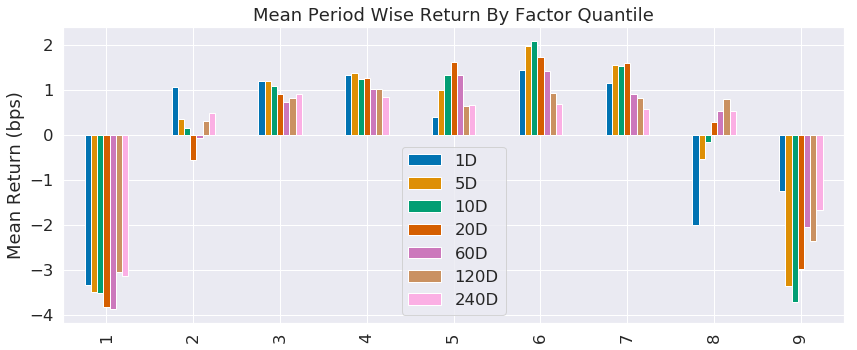

In [10]:
alphalens.tears.create_summary_tear_sheet(factor_data)

In [11]:
scores_per3month = returns.rolling(window=60,min_periods=48).std().dropna(thresh=15,axis=0).dropna(how='all',axis=1)

In [12]:
sc_p3m= scores_to_alphalens(scores_per3month)

In [13]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor=sc_p3m,prices=pivotdata,quantiles=9 ,periods=(1,5,10,20, 60,120,240))

Dropped 31.6% entries from factor data: 31.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.000000e+00,0.059411,0.008377,0.010698,197186,11.238257
2,8.245747e-10,0.063297,0.017275,0.009632,194582,11.089846
3,8.762759e-03,0.065320,0.020949,0.008727,194797,11.102100
4,1.218605e-02,0.067590,0.023334,0.008766,194145,11.064940
5,1.447293e-02,0.069711,0.025706,0.008832,194084,11.061464
6,1.621304e-02,0.071592,0.028482,0.008812,195212,11.125752
7,1.820627e-02,0.074428,0.032255,0.008622,193426,11.023962
8,2.141849e-02,0.077646,0.038085,0.008308,194942,11.110364
9,2.806604e-02,5.820640,0.056530,0.107857,196222,11.183315


Returns Analysis


,1D,5D,10D,20D,60D,120D,240D
Ann. alpha,0.426,0.224,0.124,0.140,0.026,0.028,-0.012
beta,0.156,-0.221,-0.214,-0.316,-0.063,-0.085,0.045
Mean Period Wise Return Top Quantile (bps),-3.266,-3.984,-4.352,-3.879,-3.432,-3.639,-3.046
Mean Period Wise Return Bottom Quantile (bps),-3.758,-3.776,-3.720,-3.622,-2.922,-2.573,-2.623
Mean Period Wise Spread (bps),0.492,-0.299,-0.713,-0.361,-0.486,-0.917,0.285


/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Information Analysis


,1D,5D,10D,20D,60D,120D,240D
IC Mean,-0.045,-0.060,-0.068,-0.077,-0.090,-0.101,-0.106
IC Std.,0.131,0.136,0.134,0.137,0.136,0.134,0.140
Risk-Adjusted IC,-0.344,-0.442,-0.504,-0.560,-0.660,-0.754,-0.756
t-stat(IC),NaN,-29.714,-33.896,-37.678,-44.410,-50.732,-50.884
p-value(IC),NaN,0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,NaN,0.248,0.234,0.311,0.202,0.528,0.605
IC Kurtosis,NaN,0.734,0.469,0.345,-0.071,-0.085,0.103


/home/ibrahim/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/datetimes.py:962: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Turnover Analysis


,10D,120D,1D,20D,240D,5D,60D
Quantile 1 Mean Turnover,0.140,0.430,0.031,0.215,0.483,0.088,0.383
Quantile 2 Mean Turnover,0.361,0.751,0.088,0.502,0.780,0.243,0.717
Quantile 3 Mean Turnover,0.484,0.837,0.126,0.638,0.851,0.340,0.817
Quantile 4 Mean Turnover,0.533,0.850,0.144,0.684,0.858,0.380,0.841
Quantile 5 Mean Turnover,0.543,0.858,0.145,0.694,0.868,0.386,0.847
Quantile 6 Mean Turnover,0.517,0.858,0.133,0.677,0.868,0.363,0.854
Quantile 7 Mean Turnover,0.475,0.852,0.114,0.643,0.864,0.323,0.843
Quantile 8 Mean Turnover,0.394,0.826,0.086,0.567,0.836,0.257,0.808
Quantile 9 Mean Turnover,0.188,0.725,0.034,0.313,0.771,0.112,0.664


,1D,5D,10D,20D,60D,120D,240D
Mean Factor Rank Autocorrelation,0.995,0.968,0.929,0.848,0.538,0.456,0.39


<Figure size 432x288 with 0 Axes>

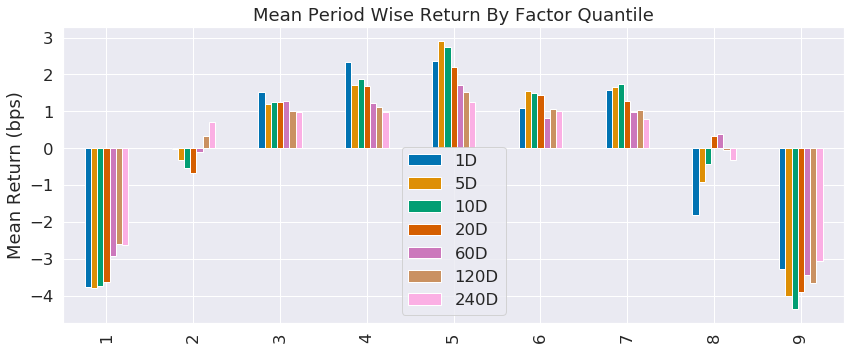

In [14]:
alphalens.tears.create_summary_tear_sheet(factor_data)

In [15]:
scores_per1year = returns.rolling(window=240,min_periods=192).std().dropna(thresh=15,axis=0).dropna(how='all',axis=1)

In [16]:
sc_p1y= scores_to_alphalens(scores_per1year)

In [17]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor=sc_p1y,prices=pivotdata,quantiles=9 ,periods=(1,5,10,20, 60,120,240))

Dropped 32.5% entries from factor data: 32.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.000000e+00,0.046270,0.010461,0.011870,188693,11.236114
2,1.403625e-09,0.048892,0.020092,0.008796,186307,11.094034
3,1.148754e-02,0.051302,0.023430,0.007745,186408,11.100049
4,1.578702e-02,0.053653,0.025630,0.007608,185773,11.062236
5,1.707630e-02,0.055822,0.027828,0.007518,185820,11.065035
6,1.901504e-02,0.057705,0.030354,0.007356,186876,11.127917
7,2.133466e-02,0.060996,0.033452,0.007114,185052,11.019303
8,2.470655e-02,0.064842,0.037832,0.006753,186543,11.108087
9,2.944264e-02,3.018540,0.054059,0.107954,187872,11.187225


Returns Analysis


,1D,5D,10D,20D,60D,120D,240D
Ann. alpha,0.192,0.297,0.174,0.209,0.021,-0.024,-0.048
beta,-0.059,-0.456,-0.357,-0.455,-0.091,0.036,0.110
Mean Period Wise Return Top Quantile (bps),-4.131,-3.499,-3.598,-3.083,-3.316,-3.012,-2.402
Mean Period Wise Return Bottom Quantile (bps),-3.284,-3.355,-3.373,-3.571,-3.889,-3.620,-3.323
Mean Period Wise Spread (bps),-0.847,-0.191,-0.252,0.458,0.749,0.897,1.585


/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ibrahim/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Information Analysis


,1D,5D,10D,20D,60D,120D,240D
IC Mean,-0.044,-0.063,-0.072,-0.083,-0.101,-0.115,-0.131
IC Std.,0.121,0.134,0.137,0.146,0.144,0.139,0.141
Risk-Adjusted IC,-0.362,-0.466,-0.527,-0.571,-0.702,-0.828,-0.929
t-stat(IC),NaN,-30.854,-34.861,-37.833,-46.485,-54.849,-61.527
p-value(IC),NaN,0.000,0.000,0.000,0.000,0.000,0.000
IC Skew,NaN,0.069,0.118,0.240,0.302,0.323,0.325
IC Kurtosis,NaN,0.626,0.212,0.084,-0.316,-0.390,-0.338


/home/ibrahim/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/datetimes.py:962: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


Turnover Analysis


,10D,120D,1D,20D,240D,5D,60D
Quantile 1 Mean Turnover,0.054,0.282,0.012,0.088,0.418,0.034,0.183
Quantile 2 Mean Turnover,0.148,0.571,0.032,0.230,0.701,0.094,0.425
Quantile 3 Mean Turnover,0.210,0.698,0.046,0.321,0.809,0.134,0.550
Quantile 4 Mean Turnover,0.244,0.745,0.053,0.368,0.833,0.156,0.609
Quantile 5 Mean Turnover,0.253,0.760,0.054,0.381,0.844,0.160,0.631
Quantile 6 Mean Turnover,0.243,0.770,0.052,0.369,0.845,0.154,0.624
Quantile 7 Mean Turnover,0.222,0.756,0.046,0.342,0.839,0.139,0.597
Quantile 8 Mean Turnover,0.172,0.681,0.033,0.273,0.806,0.106,0.519
Quantile 9 Mean Turnover,0.071,0.430,0.013,0.117,0.678,0.042,0.266


,1D,5D,10D,20D,60D,120D,240D
Mean Factor Rank Autocorrelation,0.999,0.996,0.99,0.977,0.914,0.807,0.589


<Figure size 432x288 with 0 Axes>

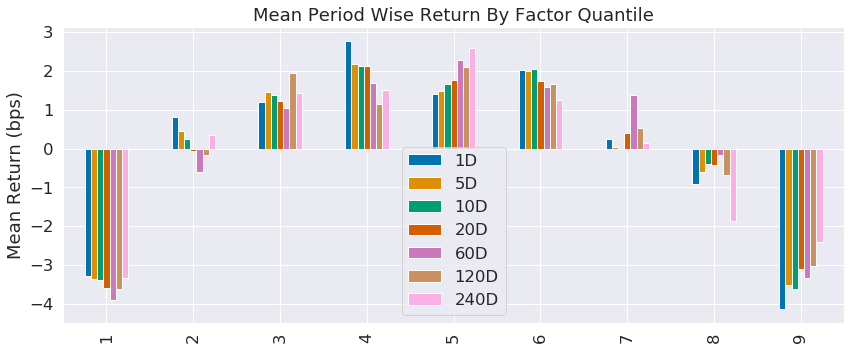

In [18]:
alphalens.tears.create_summary_tear_sheet(factor_data)